## Find binomial probability of event ocurring n times

In [91]:
from math import comb
import pyperclip
p = 0.00203 ## Probability
n = 31000 ## number of ocurrences
comb(n,63)*p**63*(1-p)**(n-63)

0.05024468664460404

## Find 0.05 value of T statistic in binomial distribution
Ie the number on which we consider the alternative to be real.

In [6]:
from scipy.stats import binom
binom.ppf(0.05, 31000, 0.00203)

50.0

## Find the p-value using Fisher Statistic

In [15]:
from scipy.stats import fisher_exact ## calculates using fisher exact the odds ratio [0] and the p-value [1]
import numpy as np
table = np.array([[39, 63], [30961, 30937]]) ## Column 1 is Treatment Group, Column 2 is Control Group. Row 1 is Deaths, Row 2 is Alive
fisher_exact(table,'less') ## Enter table as explained above, 'less' indicates a one-sided test

(0.6185677526719483, 0.011094091844052023)

## Find the z-value

In [3]:
from scipy.stats import norm
z_value = -3.0268
norm.cdf(z_value)

0.0012357871459340907

## Calculate the p-value of a t-test statistic

In [6]:

from scipy.stats import ttest_1samp
import numpy as np
## Refer to Lecture 2 to see how the t-statistic is calculated.
X = np.array([ 0.9, -0.9, 4.3, 2.9, 1.2, 3. , 2.7, 0.6, 3.6, -0.5])
t_stats,p_value = ttest_1samp(X, popmean=0) ## returns the p-value of a 2-sided test
p_value=p_value/2 ## divide by 2 to get the p-value of a one-sided test
p_value

0.005560692749284678

## Hubble Correlation exercise

In [3]:
import numpy as np
## Raw Data
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])
N = 24

In [5]:
mean_X = sum(Xs)/N
mean_Y = sum(Ys)/N
sumation = 0
for i in range(len(Xs)):
    sumation += (Xs[i]-mean_X)*(Ys[i]-mean_Y)
hubble_cov = (1/(N-1))*sumation
hubble_cov

0.919925

In [48]:
np.corrcoef(Xs,Ys)[0][1]

0.9888323018726733

## RMS estimator

In [29]:
#beta1 = r*(std(Ys)/std(Xs))
beta1 = 0.8391*(np.std(Ys)/np.std(Xs))
beta1

447.84929481977935

In [30]:
#beta0 = mean_Y - beta1*mean_X
beta0 = mean_Y - beta1*mean_X
beta0

13.629737462914477

## Correcting simple non-linear relationships

In [37]:
# Variables
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])
Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])
N = 9

In [39]:
#Correlation coefficient
np.corrcoef(Xs,Ys)

array([[1.       , 0.9888323],
       [0.9888323, 1.       ]])

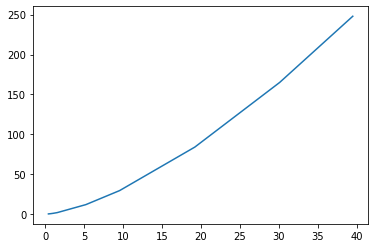

In [41]:
# evaluate linearity
from matplotlib import pyplot as plt
plt.plot(Xs,Ys)

/Users/rp/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


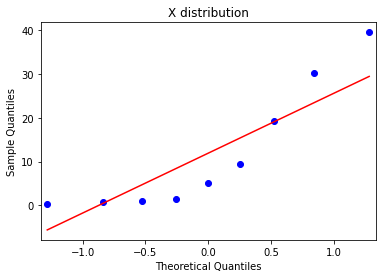

In [42]:
## qq plots should look iid if the variable is normally distributed
## https://www.statisticshowto.com/q-q-plots/
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

/Users/rp/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


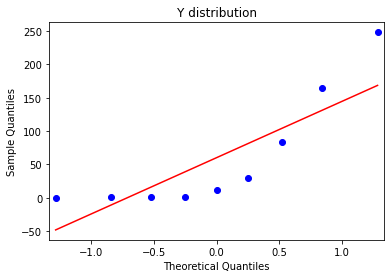

In [43]:
sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()

/Users/rp/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


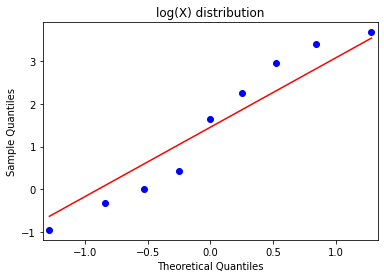

In [46]:
sm.qqplot(np.log(Xs), line='s')
plt.title("log(X) distribution")
plt.show()

/Users/rp/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


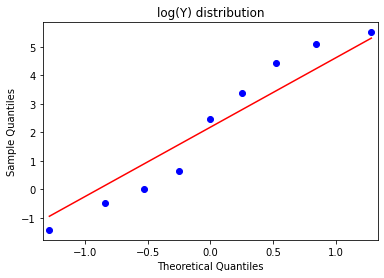

In [47]:
sm.qqplot(np.log(Ys), line='s')
plt.title("log(Y) distribution")
plt.show()

Seems like taking the log values of X and Y it is more evenly distributed.

In [53]:
beta1 = np.corrcoef(Xs,Ys)[0][1]*(np.std(Ys)/np.std(Xs))
beta1

6.108701317117373

In [57]:
np.exp(beta1)

449.75424758801483

## Multiple linear regression

In [87]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

intercept = np.ones(30)

N = 30

X = np.stack([intercept,LogPlanetRadius,LogPlanetOrbit,StarMetallicity,LogStarMass,LogStarAge], axis=1)

In [89]:
Xt_X = np.dot(np.transpose(X),X)
Xt_X_inv = np.linalg.inv(Xt_X)
Xt_X_inv_Xt = np.dot(Xt_X_inv,np.transpose(X))
final = np.dot(Xt_X_inv_Xt,LogPlanetMass)

In [83]:
Ys = LogPlanetMass
# Concatenate the variables into a matrix, np.ones_like inserts a row of ones into the start of the matrix for the intercept term.
# Taking the transpose places each variable as columns.
Xmat = np.array((np.ones_like(LogPlanetRadius), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge)).T
import numpy.linalg
# The beta estimator using the matrix inversion formula
betaVec = numpy.linalg.inv(Xmat.T.dot(Xmat)).dot(Xmat.T).dot(Ys)

In [93]:
final

array([ 0.15379303,  1.40214538, -0.14099818, -1.59951364, -0.95610919,
       -0.46176234])

## Model Selection and regularization
Here we estimate the parameters which are most likely to have large errors and avoid them.

In [94]:
# First, estimate the standard deviation of the noise.
sigmaHat = np.sqrt( np.sum( np.square(Ys - Xmat.dot(betaVec) )) / ( N - Xmat.shape[1] ) )
# Now estimate the (matrix part of the) covariance matrix for beta 
import numpy.linalg
betaCov = numpy.linalg.inv(Xmat.T.dot(Xmat))
# Use the formula for the t-test statistic for each variable
tVals = betaVec/(sigmaHat * np.sqrt(np.diagonal(betaCov)))
# Calculate the 2-sided p-values.
import scipy.stats
pvals = scipy.stats.t.sf(np.abs(tVals), N-Xmat.shape[1])*2

In [95]:
pvals

array([9.12757006e-01, 5.43077387e-05, 6.98598654e-01, 2.13109749e-01,
       4.00456619e-01, 2.25952781e-01])

## Homework 1.2

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='emission_rate', ylabel='Count'>

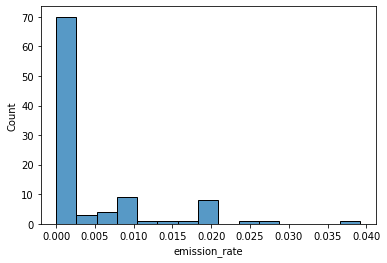

In [5]:
df = pd.read_csv("data/module1/gamma-ray.csv");
df['emission_rate']=df['count']/df['seconds'];
sns.histplot(df['emission_rate'])

In [6]:
avg = sum(df['count'])/sum(df['seconds'])

In [10]:
prod = np.product(df['emission_rate'])

In [12]:
prod*100000000000

0.0

## Problem 1.4

In [21]:
golub_data, golub_classnames = ( np.genfromtxt(open('data/module1/golub_data/{}'.format(fname)), delimiter=',', names=True, converters={0: lambda s: int(s.strip(b'"'))}) for fname in ['golub.csv', 'golub_cl.csv'] )

In [61]:
df = pd.DataFrame(golub_data)
df.index = df['f0']
df = df.drop('f0',axis=1)
df['mean_ALL'] = df[df.columns[0:27]].mean(axis=1)
df['mean_AML'] = df[df.columns[28:]].mean(axis=1)
df['var_ALL'] = df[df.columns[0:27]].var(axis=1)
df['var_AML'] = df[df.columns[28:]].var(axis=1)
df['t_welch'] = (df['mean_ALL']-df['mean_AML'])/((df['var_ALL']+df['var_AML'])**0.5)
df['v'] = round(((df['var_ALL']+df['var_AML'])**2)/((1/26*df['var_ALL'])+(1/10*df['var_AML'])),0)
stats.ttest_ind_from_stats(df['mean_ALL'], df['mean_AML'], df['var_ALL'], df['var_AML'], unpaid_likes.std(), unpaid_likes.shape[0], equal_var=False)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,mean_ALL,mean_AML,var_ALL,var_AML,t_welch,v
f0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,-1.28137,-1.03209,-1.36149,-1.39979,0.17628,-1.40095,-1.56783,-1.20466,-1.24482,-1.60767,-1.06221,-1.12665,-1.20963,-1.48332,-1.25268,-1.27619,-1.23051,-1.43337,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465,-1.271510,-0.764533,0.103880,0.724839,-0.556910,9.0
2.0,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,-1.28137,-1.03209,-0.74005,-0.83161,0.41200,-1.27669,-0.74370,-1.20466,-1.02380,-0.38779,-1.06221,-1.12665,-1.20963,-1.12185,-0.65264,-1.27619,-1.23051,-1.18065,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804,-0.909814,-0.667320,0.168032,0.505741,-0.295422,8.0
3.0,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,-0.39560,-0.62533,0.45181,1.09519,1.09318,0.34300,0.20010,0.38992,0.00641,1.10932,0.21952,-0.72267,0.51690,0.28577,0.61937,0.20085,0.29278,0.26624,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509,0.266578,0.246670,0.214166,0.306619,0.027587,7.0
4.0,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,0.59110,3.26050,-1.36149,0.64180,2.32621,-1.40095,-1.56783,0.83502,-1.24482,-1.60767,-1.06221,3.69445,3.70837,-1.48332,2.36698,-1.27619,2.89604,0.71990,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186,0.998514,0.854375,3.703405,1.659162,0.062244,93.0
5.0,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,-1.10133,2.59982,-1.36149,0.22853,2.34494,-1.40095,-1.56783,0.94532,-1.24482,-1.60767,-1.06221,3.52458,3.70837,-1.48332,1.79168,-1.27619,2.24892,0.02799,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788,0.685679,0.018873,3.400602,2.343310,0.278225,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047.0,0.04695,0.48704,0.72170,0.58403,0.30600,1.10563,0.59002,0.30773,0.46515,0.88991,0.40214,-0.24863,0.19678,-0.03138,0.34839,0.34602,0.54402,0.47598,0.07377,0.28150,0.57491,0.19498,1.07628,0.37532,0.01405,0.49138,0.74901,0.40676,0.39585,0.35006,0.32939,0.55791,0.11369,0.77377,-0.05275,0.93171,0.01243,0.86634,0.421062,0.427224,0.102446,0.099929,-0.013697,3.0
3048.0,-0.20467,-0.07832,-1.00615,-0.88748,0.07175,-0.71376,-0.98900,-0.36098,-0.99075,-1.20668,-0.99634,-0.38832,0.11254,-0.63454,-0.33676,0.03590,-0.77623,0.66042,1.59055,-1.00802,-1.06221,-0.24490,-0.66182,-0.62739,0.25076,1.70638,-1.23051,0.15568,-0.13951,-0.01776,-0.57690,-0.13350,-0.33722,-1.04023,-0.71434,-0.08540,-0.30978,-0.24197,-0.369501,-0.360556,0.576505,0.146280,-0.010522,14.0
3049.0,0.45231,0.42686,0.67579,0.31524,-0.57779,0.51322,0.89885,1.26549,0.24663,0.38565,0.44349,0.00557,0.35337,-0.05047,-0.80606,0.49199,0.82856,0.57640,0.36443,0.55919,-0.38991,1.07012,0.55371,0.26707,0.91343,0.68704,0.43196,0.65067,-0.13281,0.35006,0.32333,0.75559,1.22578,0.59945,0.72956,0.72762,1.10466,1.16990,0.403783,0.659720,0.215584,0.157144,-0.419215,6.0


In [44]:
golub_data.shape

(3051,)

In [38]:
golub_classnames

array([( 1., 0.), ( 2., 0.), ( 3., 0.), ( 4., 0.), ( 5., 0.), ( 6., 0.),
       ( 7., 0.), ( 8., 0.), ( 9., 0.), (10., 0.), (11., 0.), (12., 0.),
       (13., 0.), (14., 0.), (15., 0.), (16., 0.), (17., 0.), (18., 0.),
       (19., 0.), (20., 0.), (21., 0.), (22., 0.), (23., 0.), (24., 0.),
       (25., 0.), (26., 0.), (27., 0.), (28., 1.), (29., 1.), (30., 1.),
       (31., 1.), (32., 1.), (33., 1.), (34., 1.), (35., 1.), (36., 1.),
       (37., 1.), (38., 1.)], dtype=[('f0', '<f8'), ('x', '<f8')])

In [41]:
golub_classnames[0:27]

array([( 1., 0.), ( 2., 0.), ( 3., 0.), ( 4., 0.), ( 5., 0.), ( 6., 0.),
       ( 7., 0.), ( 8., 0.), ( 9., 0.), (10., 0.), (11., 0.), (12., 0.),
       (13., 0.), (14., 0.), (15., 0.), (16., 0.), (17., 0.), (18., 0.),
       (19., 0.), (20., 0.), (21., 0.), (22., 0.), (23., 0.), (24., 0.),
       (25., 0.), (26., 0.), (27., 0.)],
      dtype=[('f0', '<f8'), ('x', '<f8')])

## Problem 1.6

### OLS estimator

In [4]:
import pandas as pd
import numpy as np
X = pd.read_csv("data/module1/syn_X.csv",header=None)
y = pd.read_csv("data/module1/syn_y.csv",header=None)
X.insert(0,'intercept',1) ## Adds intercept column

In [75]:
np.linalg.lstsq(X,y)

/var/folders/4q/6nbbxgdx0ns_fd_xks1brmh80000gq/T/ipykernel_80574/2766035623.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(X,y)


(array([[ 1.92960603],
        [ 1.26397096],
        [-4.59799331]]),
 array([24.16354412]),
 3,
 array([11.82787785, 10.36042339,  9.41145881]))

## Gradient Descent

In [76]:
cur_x = 3 # The algorithm starts at x=3
rate = 0.01 # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter
df = lambda x: 2*(x+5) #Gradient of our function

In [77]:
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

In [6]:
def cal_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [28]:
def gradient_descent(X,y,theta,learning_rate=0.1,precision=10**-6, iterations = 100000):
    '''
    X = Matric with added bias units
    y = Vector of Y
    theta = Vector of thetas
    learning rate
    iterations = number of iteration
    
    Returns final theta vector'''
    
    m = len(y)
    cost_history = []
    theta_history = []
    iteration = 0
    cost = cal_cost(theta,X,y).values
    while True and iteration<iterations:
        iteration+=1
        prediction = np.dot(X,theta)
        
        theta = theta - (1/m)*learning_rate * (X.T.dot((prediction -y)))
        theta_history.append(theta.T)
        actual_precision = abs(cost - cal_cost(theta,X,y).values)
        cost = cal_cost(theta,X,y).values
        print(precision)
        cost_history.append(cal_cost(theta,X,y))
        if actual_precision <= precision:
            break
        
    return iteration

In [42]:
theta = np.random.randn(3,1)
gradient_descent(X,y,theta,learning_rate=0.9,precision=10**-6)

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06


10

In [45]:
import zipfile
import numpy as np

# returns a 3-tuple of (list of city names, list of variable names, numpy record array with each variable as a field)
def read_mortality_csv(zip_file):
  import io
  import csv
  fields, cities, values = None, [], []
  with io.TextIOWrapper(open('data/module1/mortality.csv')) as wrap:
      csv_reader = csv.reader(wrap, delimiter=',', quotechar='"')
      fields = next(csv_reader)[1:]
      for row in csv_reader:
          cities.append(row[0])
          values.append(tuple(map(float, row[1:])))
  dtype = np.dtype([(name, float) for name in fields])
  return cities, fields, np.array(values, dtype=dtype).view(np.recarray)

with zipfile.ZipFile("hw0_data_and_materials.zip") as zip_file:
  m_cities, m_fields, m_values = read_mortality_csv(zip_file)

FileNotFoundError: [Errno 2] No such file or directory: 'hw0_data_and_materials.zip'